In [1]:
DATA_DIR = '/Users/everettwetchler/src/research/zaki/github/analysis/data/2019–2020/'
PLOT_DIR = DATA_DIR + 'plots/'

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-and-clean-prefrosh-data" data-toc-modified-id="Load-and-clean-prefrosh-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and clean prefrosh data</a></span><ul class="toc-item"><li><span><a href="#Check-for-incomplete-data" data-toc-modified-id="Check-for-incomplete-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check for incomplete data</a></span></li><li><span><a href="#Check-that-all-Ps-are-over-18" data-toc-modified-id="Check-that-all-Ps-are-over-18-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check that all Ps are over 18</a></span></li><li><span><a href="#Check-for-duplicates-(people-who-did-the-survey-more-than-once)" data-toc-modified-id="Check-for-duplicates-(people-who-did-the-survey-more-than-once)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check for duplicates (people who did the survey more than once)</a></span></li><li><span><a href="#Compute-scale-scores" data-toc-modified-id="Compute-scale-scores-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Compute scale scores</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Race" data-toc-modified-id="Race-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Race</a></span></li></ul></li><li><span><a href="#Load-and-clean-network-trait-data" data-toc-modified-id="Load-and-clean-network-trait-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load and clean network trait data</a></span><ul class="toc-item"><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check for duplicates</a></span></li><li><span><a href="#Compute-scales" data-toc-modified-id="Compute-scales-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compute scales</a></span></li><li><span><a href="#Drop-columns-we-don't-need" data-toc-modified-id="Drop-columns-we-don't-need-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Drop columns we don't need</a></span></li><li><span><a href="#Peek-at-frequency-of-missing-values" data-toc-modified-id="Peek-at-frequency-of-missing-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Peek at frequency of missing values</a></span></li><li><span><a href="#International-Students" data-toc-modified-id="International-Students-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>International Students</a></span></li><li><span><a href="#Parental-Education" data-toc-modified-id="Parental-Education-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Parental Education</a></span></li><li><span><a href="#Family-Income" data-toc-modified-id="Family-Income-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Family Income</a></span></li></ul></li><li><span><a href="#Load-nominations-and-compute-union-network-in/out-degree-for-each-P" data-toc-modified-id="Load-nominations-and-compute-union-network-in/out-degree-for-each-P-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load nominations and compute union network in/out degree for each P</a></span><ul class="toc-item"><li><span><a href="#Spot-check-one-person" data-toc-modified-id="Spot-check-one-person-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Spot check one person</a></span></li><li><span><a href="#Add-columns-to-network-dataframe" data-toc-modified-id="Add-columns-to-network-dataframe-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Add columns to network dataframe</a></span></li><li><span><a href="#Quick-summary" data-toc-modified-id="Quick-summary-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Quick summary</a></span></li></ul></li><li><span><a href="#Merge-prefrosh-and-network-data" data-toc-modified-id="Merge-prefrosh-and-network-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Merge prefrosh and network data</a></span><ul class="toc-item"><li><span><a href="#A-look-at-in-and-out-degree-distributions,-to-be-sure-they-seem-sane" data-toc-modified-id="A-look-at-in-and-out-degree-distributions,-to-be-sure-they-seem-sane-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>A look at in and out degree distributions, to be sure they seem sane</a></span></li></ul></li><li><span><a href="#Create-dorm-level-features" data-toc-modified-id="Create-dorm-level-features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create dorm-level features</a></span><ul class="toc-item"><li><span><a href="#Spot-check---the-whole-dorm-average-should-be-very-close-(but-not-identical)-to-the-whole-dorm-without-this-person-average" data-toc-modified-id="Spot-check---the-whole-dorm-average-should-be-very-close-(but-not-identical)-to-the-whole-dorm-without-this-person-average-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Spot check - the whole dorm average should be very close (but not identical) to the whole-dorm-without-this-person average</a></span></li></ul></li><li><span><a href="#Create-personal-network-level-features" data-toc-modified-id="Create-personal-network-level-features-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Create personal-network level features</a></span></li><li><span><a href="#Write" data-toc-modified-id="Write-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Write</a></span></li></ul></div>

## Imports

In [2]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

# Plot directly in notebook
# NOTE: break this command into it's own cell, and run
# it BEFORE everything below it. Unfortunately that's
# the only way to get the plot settings to stick.
%matplotlib inline

Everett Wetchler 2020-01-11 10:19:18 PST 

CPython 3.6.5
IPython 7.8.0

numpy 1.17.3
pandas 0.25.1
matplotlib 3.1.0
seaborn 0.9.0
watermark 2.0.1


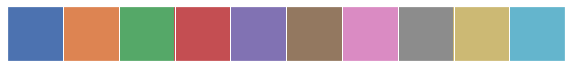

In [3]:
import datetime as dt
import os
import random
import re
import simplejson as json

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

# Customize default chart graphics
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# It's useful to have some named colors handy
(SNS_BLUE, SNS_ORANGE, SNS_GREEN,
 SNS_RED, SNS_PURPLE, SNS_BROWN,
 SNS_PINK, SNS_GRAY, SNS_YELLOW,
 SNS_CYAN) = sns.color_palette()
sns.palplot(sns.color_palette())

# Watermark extension to print version/system information
# Flags:
# -a [author] --v (python/ipython versions) -d (date)
# -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version)
# -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -v -d -t -z -w -p numpy,pandas,matplotlib,seaborn

####################################################
# END Boilerplate
####################################################

In [4]:
from collections import defaultdict

## Load and clean prefrosh data

In [5]:
prefrosh = pd.read_csv(os.path.join(DATA_DIR, 'Prefrosh_Survey/df_prefroshCleanData.csv'), index_col=0)
print(prefrosh.shape)
prefrosh.head()

(1102, 59)


,PID,Progress,Duration..in.seconds.,Finished,RecordedDate,age18,lifeSatisfaction_1,lifeSatisfaction_2,lifeSatisfaction_3,lifeSatisfaction_4,lifeSatisfaction_5,lifeSatisfaction_6,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Sociality_1,Sociality_2,NeedToBelong_1,NeedToBelong_2,NeedToBelong_3,NeedToBelong_4,LayEmpathy_1,LayEmpathy_2,LayEmpathy_3,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,loneliness_1,loneliness_2,loneliness_3,Stress_1,Stress_2,poliIdeology_1,poliIdeology_2,poliIdeology_3,politicalIssues_1,politicalIssues_2,ladderUS,gender,gender_3_TEXT,race,race_9_TEXT,major,dorm,lifeSatisfaction_6R,NeedToBelong_2R,LayEmpathy_3R
1,4507,100,358,True,2019-09-03 09:35:54,Yes,7.0,1.0,1.0,2.0,1.0,1,6,6,6,6,6,7,6,6,6.0,5.0,7,1,7,7,1,2,5,5,6,6,3.0,6,2.0,7.0,6.0,3.0,1,3.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,7.0,7.0,3.0,Male,NaN,Black or African American,NaN,Management Science and Engineering,Eucalipto,7,7,3
2,2903,100,208,True,2019-09-16 13:41:44,Yes,7.0,7.0,7.0,7.0,7.0,2,5,6,4,6,6,5,5,7,7.0,7.0,3,7,7,5,3,6,2,6,3,7,2.0,7,2.0,5.0,5.0,6.0,2,1.0,2.0,1.0,3.0,2.0,2.0,1.0,4.0,7.0,7.0,8.0,Female,NaN,"White or Caucasian,Hispanic or Latino/a",NaN,Economics,Larkin,6,1,6
3,1637,100,452,True,2019-09-06 13:26:16,Yes,7.0,6.0,6.0,7.0,6.0,2,7,7,6,7,7,7,7,7,6.0,5.0,3,6,3,4,5,3,5,5,2,6,3.0,6,6.0,7.0,1.0,7.0,2,3.0,2.0,1.0,2.0,2.0,4.0,3.0,5.0,6.0,6.0,9.0,Male,NaN,"East Asian,White or Caucasian",NaN,Economics,Norcliffe,6,2,3
4,1923,100,1087,True,2019-09-03 18:12:17,Yes,6.0,7.0,7.0,7.0,7.0,1,6,7,6,6,5,5,3,6,5.0,5.0,2,6,5,7,1,1,7,6,4,5,2.0,7,4.0,5.0,3.0,6.0,3,2.0,1.0,1.0,2.0,1.0,4.0,3.0,4.0,5.0,5.0,8.0,Male,NaN,East Asian,NaN,Symbolic Systems,Larkin,7,2,1
5,7189,100,290,True,2019-09-09 18:54:16,Yes,2.0,4.0,3.0,5.0,3.0,5,7,7,6,5,7,7,3,7,7.0,1.0,2,6,2,2,3,3,5,3,6,7,5.0,6,3.0,5.0,2.0,5.0,3,2.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0,7.0,7.0,6.0,Female,NaN,Middle Eastern,NaN,Human Biology,Alondra,3,2,3


### Check for incomplete data

In [6]:
prefrosh['Finished'].value_counts()

True     1101
False       1
Name: Finished, dtype: int64

In [7]:
print(f"Dropping {sum(-prefrosh['Finished'])} incomplete surveys")
prefrosh = prefrosh[prefrosh['Finished']]

Dropping 1 incomplete surveys


In [8]:
prefrosh['Progress'].value_counts()

100    1101
Name: Progress, dtype: int64

### Check that all Ps are over 18

In [9]:
prefrosh['age18'].value_counts()

Yes    1101
Name: age18, dtype: int64

### Check for duplicates (people who did the survey more than once)

In [10]:
len(prefrosh), len(set(prefrosh['PID']))

(1101, 1091)

In [11]:
prefrosh = prefrosh.sort_values(['PID', 'RecordedDate'])
n_before = len(prefrosh)
prefrosh.drop_duplicates(subset=['PID'], keep='first', inplace=True)
print(f"Dropping {n_before - len(prefrosh)} surveys from people who had already completed the survey once")

Dropping 10 surveys from people who had already completed the survey once


In [12]:
prefrosh.drop(columns=['age18', 'Finished', 'Progress', 'Duration..in.seconds.', 'RecordedDate'], inplace=True)
prefrosh.set_index('PID', inplace=True)
print(prefrosh.shape)
prefrosh.head()

(1091, 53)


,lifeSatisfaction_1,lifeSatisfaction_2,lifeSatisfaction_3,lifeSatisfaction_4,lifeSatisfaction_5,lifeSatisfaction_6,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Sociality_1,Sociality_2,NeedToBelong_1,NeedToBelong_2,NeedToBelong_3,NeedToBelong_4,LayEmpathy_1,LayEmpathy_2,LayEmpathy_3,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,loneliness_1,loneliness_2,loneliness_3,Stress_1,Stress_2,poliIdeology_1,poliIdeology_2,poliIdeology_3,politicalIssues_1,politicalIssues_2,ladderUS,gender,gender_3_TEXT,race,race_9_TEXT,major,dorm,lifeSatisfaction_6R,NeedToBelong_2R,LayEmpathy_3R
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,3.0,7.0,3.0,5.0,6.0,3,7,7,5,5,7,7,7,6,7.0,3.0,2,3,6,7,1,1,7,7,3,6,3.0,7,2.0,7.0,3.0,4.0,2,2.0,1.0,1.0,3.0,2.0,5.0,2.0,5.0,4.0,7.0,7.0,Male,NaN,South Asian,NaN,Computer Science,Rinconada,5,5,1
1004,2.0,4.0,2.0,2.0,4.0,5,5,6,6,6,7,6,6,6,6.0,5.0,6,4,5,5,2,2,5,4,2,5,4.0,5,4.0,5.0,4.0,6.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,1.0,Female,NaN,South Asian,NaN,Undecided,Donner,3,4,3
1012,6.0,6.0,6.0,6.0,6.0,2,6,6,6,5,6,6,6,6,5.0,5.0,5,3,5,5,3,2,5,5,2,4,3.0,5,5.0,5.0,1.0,6.0,1,2.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0,5.0,7.0,5.0,Male,NaN,South Asian,NaN,Undecided,Cedro,6,5,3
1027,7.0,7.0,7.0,7.0,7.0,2,7,7,6,7,7,7,7,7,7.0,5.0,3,3,4,5,2,2,2,7,2,7,3.0,7,1.0,7.0,6.0,6.0,1,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,7.0,7.0,8.0,Female,NaN,White or Caucasian,NaN,Undecided. Maybe Symbolic Systems,Junipero,6,5,6
1036,5.0,1.0,1.0,7.0,1.0,7,5,7,3,6,3,5,6,7,7.0,5.0,7,2,7,7,5,3,6,1,3,1,7.0,2,7.0,1.0,7.0,1.0,5,2.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,7.0,7.0,6.0,Other. Please specify:,Nonbinary,Other. Please specify:,Southeast Asian and White,Symbolic Systems and Linguistics,FroSoCo,1,6,2


In [13]:
for prefix in ('LayEmpathy', 'Sociality', 'NeedToBelong', 'poliIdeology', 'politicalIssues'):
    prefrosh.drop(columns=[c for c in prefrosh.columns if c.startswith(prefix + '_')], inplace=True)
prefrosh.drop(columns=['ladderUS', 'gender_3_TEXT', 'race_9_TEXT', 'major', 'lifeSatisfaction_6'], inplace=True)
print(prefrosh.shape)
prefrosh.head()

(1091, 32)


,lifeSatisfaction_1,lifeSatisfaction_2,lifeSatisfaction_3,lifeSatisfaction_4,lifeSatisfaction_5,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,loneliness_1,loneliness_2,loneliness_3,Stress_1,Stress_2,gender,race,dorm,lifeSatisfaction_6R
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,3.0,7.0,3.0,5.0,6.0,7,7,5,5,7,7,7,6,7,3,6,3.0,7,2.0,7.0,3.0,4.0,2,2.0,1.0,1.0,3.0,2.0,Male,South Asian,Rinconada,5
1004,2.0,4.0,2.0,2.0,4.0,5,6,6,6,7,6,6,6,4,2,5,4.0,5,4.0,5.0,4.0,6.0,2,2.0,2.0,2.0,2.0,2.0,Female,South Asian,Donner,3
1012,6.0,6.0,6.0,6.0,6.0,6,6,6,5,6,6,6,6,5,2,4,3.0,5,5.0,5.0,1.0,6.0,1,2.0,2.0,2.0,2.0,1.0,Male,South Asian,Cedro,6
1027,7.0,7.0,7.0,7.0,7.0,7,7,6,7,7,7,7,7,7,2,7,3.0,7,1.0,7.0,6.0,6.0,1,1.0,1.0,1.0,2.0,2.0,Female,White or Caucasian,Junipero,6
1036,5.0,1.0,1.0,7.0,1.0,5,7,3,6,3,5,6,7,1,3,1,7.0,2,7.0,1.0,7.0,1.0,5,2.0,3.0,3.0,3.0,3.0,Other. Please specify:,Other. Please specify:,FroSoCo,1


### Compute scale scores

In [14]:
prefrosh.isnull().sum()

lifeSatisfaction_1     2
lifeSatisfaction_2     1
lifeSatisfaction_3     1
lifeSatisfaction_4     1
lifeSatisfaction_5     2
Empathy_1              0
Empathy_2              0
Empathy_3              0
Empathy_4              0
Empathy_5              0
Empathy_6              0
Empathy_7              0
Empathy_8              0
TIPI_1                 0
TIPI_2                 0
TIPI_3                 0
TIPI_4                 1
TIPI_5                 0
TIPI_6                 1
TIPI_7                 2
TIPI_8                 1
TIPI_9                 1
TIPI_10                0
loneliness_1           3
loneliness_2           3
loneliness_3           3
Stress_1               2
Stress_2               2
gender                 0
race                   5
dorm                   2
lifeSatisfaction_6R    0
dtype: int64

In [15]:
composites = {
    'life_satisfaction_t1': [
        'lifeSatisfaction_1',
         'lifeSatisfaction_2',
         'lifeSatisfaction_3',
         'lifeSatisfaction_4',
         'lifeSatisfaction_5',
         'lifeSatisfaction_6R'],
    'empathy': [c for c in prefrosh.columns if c.startswith('Empathy')],
    'loneliness_t1': [c for c in prefrosh.columns if c.startswith('loneliness')],
    'stress_t1': [c for c in prefrosh.columns if c.startswith('Stress')],
}
for score, components in composites.items():
    prefrosh[score] = prefrosh[components].mean(axis=1)
    prefrosh.drop(columns=components, inplace=True)

print(prefrosh.shape)
prefrosh.head()

(1091, 17)


,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1
PID,,,,,,,,,,,,,,,,,
1001,7,3,6,3.0,7,2.0,7.0,3.0,4.0,2,Male,South Asian,Rinconada,4.833333,6.375,1.333333,2.5
1004,4,2,5,4.0,5,4.0,5.0,4.0,6.0,2,Female,South Asian,Donner,2.833333,6.000,2.000000,2.0
1012,5,2,4,3.0,5,5.0,5.0,1.0,6.0,1,Male,South Asian,Cedro,6.000000,5.875,2.000000,1.5
1027,7,2,7,3.0,7,1.0,7.0,6.0,6.0,1,Female,White or Caucasian,Junipero,6.833333,6.875,1.000000,2.0
1036,1,3,1,7.0,2,7.0,1.0,7.0,1.0,5,Other. Please specify:,Other. Please specify:,FroSoCo,2.666667,5.250,2.666667,3.0


In [16]:
TIPI_LOOKUP = [
    ['E', 1, 6],  # Dimension, positive item, reverse item
    ['A', 7, 2],
    ['O', 5, 10],
    ['N', 4, 9],
    ['C', 3, 8],
]
for trait, pos, neg in TIPI_LOOKUP:
    pos = f'TIPI_{pos}'
    neg = f'TIPI_{neg}'
    prefrosh[neg] = 8 - prefrosh[neg]
    prefrosh[f'BFI_{trait}'] = prefrosh[[pos, neg]].mean(axis=1)
    prefrosh.drop(columns=[pos, neg], inplace=True)

In [17]:
print(prefrosh.shape)
prefrosh.head()

(1091, 12)


,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C
PID,,,,,,,,,,,,
1001,Male,South Asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,6.5,3.5,5.5
1004,Female,South Asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,5.5,3.0,4.5
1012,Male,South Asian,Cedro,6.000000,5.875,2.000000,1.5,4.0,5.5,6.0,2.5,5.5
1027,Female,White or Caucasian,Junipero,6.833333,6.875,1.000000,2.0,7.0,6.5,7.0,2.5,4.5
1036,Other. Please specify:,Other. Please specify:,FroSoCo,2.666667,5.250,2.666667,3.0,1.0,3.0,2.5,7.0,1.0


### Gender

In [18]:
prefrosh['gender'].isnull().sum()

0

In [19]:
prefrosh['gender'].value_counts()

Female                    573
Male                      502
Prefer not to answer       10
Other. Please specify:      6
Name: gender, dtype: int64

In [81]:
GENDER_MAPPING = {
    "Female": 'female',
    'Male': 'male',
    'Prefer not to answer': None,
    'Other. Please specify:': 'other'
}
GENDER_MAPPING

{'Female': 'female',
 'Male': 'male',
 'Prefer not to answer': None,
 'Other. Please specify:': 'other'}

In [20]:
prefrosh['gender'] = prefrosh['gender'].map(GENDER_MAPPING)
prefrosh['gender'].value_counts()

female    573
male      502
other       6
Name: gender, dtype: int64

### Race

In [21]:
prefrosh['race'].isnull().sum()

5

In [22]:
prefrosh['race'].value_counts()

White or Caucasian                                                     326
East Asian                                                             197
Hispanic or Latino/a                                                   132
South Asian                                                            105
Black or African American                                               93
Other. Please specify:                                                  69
Middle Eastern                                                          30
White or Caucasian,Hispanic or Latino/a                                 29
East Asian,White or Caucasian                                           20
Native American                                                         12
Pacific Islander                                                         9
Black or African American,White or Caucasian                             8
White or Caucasian,Middle Eastern                                        7
Native American,White or 

In [23]:
races = set()
for x in prefrosh['race']:
    if pd.isnull(x):
        continue
    parts = x.split(',')
    for p in parts:
        races.add(p)
for r in races:
    suggestion = r.lower().replace(' ', '_')
    print(f'    "{r}": "{suggestion}",')

    "White or Caucasian": "white_or_caucasian",
    "East Asian": "east_asian",
    "Other. Please specify:": "other._please_specify:",
    "Middle Eastern": "middle_eastern",
    "Pacific Islander": "pacific_islander",
    "Native American": "native_american",
    "Hispanic or Latino/a": "hispanic_or_latino/a",
    "Black or African American": "black_or_african_american",
    "South Asian": "south_asian",


In [24]:
RACE_MAPPING = {
    "South Asian": "south_asian",
    "Native American": "other_or_mixed",
    "Hispanic or Latino/a": "hispanic",
    "Middle Eastern": "other_or_mixed",
    "Pacific Islander": "other_or_mixed",
    "Black or African American": "black",
    "Other. Please specify:": "other_or_mixed",
    "East Asian": "east_asian",
    "White or Caucasian": "white",
}
prefrosh['race'] = prefrosh['race'].map(RACE_MAPPING)
prefrosh['race'].value_counts()

white             326
east_asian        197
hispanic          132
other_or_mixed    120
south_asian       105
black              93
Name: race, dtype: int64

In [25]:
prefrosh.head()

,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C
PID,,,,,,,,,,,,
1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,6.5,3.5,5.5
1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,5.5,3.0,4.5
1012,male,south_asian,Cedro,6.000000,5.875,2.000000,1.5,4.0,5.5,6.0,2.5,5.5
1027,female,white,Junipero,6.833333,6.875,1.000000,2.0,7.0,6.5,7.0,2.5,4.5
1036,other,other_or_mixed,FroSoCo,2.666667,5.250,2.666667,3.0,1.0,3.0,2.5,7.0,1.0


## Load and clean network trait data

In [26]:
network = pd.read_csv(os.path.join(DATA_DIR, 'Network_Survey/network_traitData.csv'), index_col=0)
print(network.shape)
network.head()

(1157, 144)


,PID,Duration..in.seconds.,Age,meaningRelationships_1,meaningRelationships_2,meaningRelationships_3,CloseFrds_OffCampus,NegEmoSupp_OffCampus,NegEmoSupp_Family,NegEmoSupp_Family_7_TEXT,StudentGroups_1,StudentGroups_2,StudentGroups_3,GroupsOther_4,GroupsOther_5,GroupsOther_6,NegativeWellBeing_1,NegativeWellBeing_2,NegativeWellBeing_3,NegativeWellBeing_4,NegativeWellBeing_5,NegativeWellBeing_6,NegativeWellBeing_7,NegativeWellBeing_8,NegativeWellBeing_9,NegativeWellBeing_10,SocialEmotionality_1,SocialEmotionality_2,SocialEmotionality_3,SocialEmotionality_4,SocialEmotionality_5,SocialEmotionality_6,SocialEmotionality_7,SocialEmotionality_8,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Empathy_9,Empathy_10,Empathy_11,Empathy_12,Empathy_13,Narcissism_1,Narcissism_2,Narcissism_3,Narcissism_4,Narcissism_5,Narcissism_6,Narcissism_7,Narcissism_8,Narcissism_9,NeedToBelong_1,NeedToBelong_2,NeedToBelong_3,NeedToBelong_4,NeedToBelong_5,NeedToBelong_6,NeedToBelong_7,NeedToBelong_8,NeedToBelong_9,NeedToBelong_10,NeedToBelong_11,LifeSatisfaction_1,LifeSatisfaction_2,LifeSatisfaction_3,LifeSatisfaction_4,LifeSatisfaction_5,LifeSatisfaction_6,LifeSatisfaction_7,LifeSatisfaction_8,LifeSatisfaction_9,loneliness_1,loneliness_2,loneliness_3,Stress_1,Stress_2,Sociality_1,Sociality_2,belongingness_1,belongingness_2,belongingness_3,IRQextra_1,IRQextra_2,IRQextra_3,IRQextra_4,IRQextra_5,LayEmpathy_1,LayEmpathy_2,LayEmpathy_3,TIPI_Extra,TIPI_Criti,TIPI_Depen,TIPI_Anx,TIPI_Open,TIPI_Reserv,TIPI_Symp,TIPI_Disorg,TIPI_EmoSta,TIPI_Conven,zeroSum_1,zeroSum_2,CloseFrds_Others_On,CloseFrds_Others_Off,empAmb_you,empAmb_dorm,empAmb_stanford,PoliIdeology_general,PoliIdeology_social,PoliIdeology_economic,PoliticalIssues_1,PoliticalIssues_1AveSta,PoliticalIssues_2,PoliticalIssues_2AveSta,LegitimizingMyths_1,LegitimizingMyths_2,LegitimizingMyths_3,LegitimizingMyths_4,LegitimizingMyths_5,LegitimizingMyths_6,ladderUS,ladderSU,Gender,Gender_3_TEXT,Race,Race_9_TEXT,Major,IntStu,FamilyIncome,ParEd1,ParEd2,DID,HID,NegativeWellBeing_2R,NeedToBelong_11R,LifeSatisfaction_7R,LayEmpathy_3R,LegitimizingMyths_2R,LegitimizingMyths_4R,LegitimizingMyths_6R
1,1001,867,18,4.0,4.0,2.0,10.0,4.0,"Mother,Sibling(s)",NaN,None,NaN,NaN,NaN,NaN,NaN,5.0,7.0,3.0,3.0,3.0,5.0,6.0,5.0,3.0,5.0,4.0,4.0,6.0,4.0,4.0,4.0,5.0,4.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,5.0,5.0,5.0,5.0,4.0,1.0,6.0,1.0,5.0,7.0,5.0,7.0,5.0,6.0,5.0,7.0,7.0,6.0,5.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,5.0,7.0,3.0,2.0,2.0,2.0,2.0,1.0,7.0,5.0,6.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,1.0,1.0,7.0,6.0,1.0,7.0,2.0,7.0,3.0,5.0,4.0,7.0,5.0,1.0,1.0,3.0,4.0,6.0,5.0,6.0,4.0,4.0,4.0,3.0,7.0,7.0,7.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,6.0,Male,NaN,East Asian,NaN,Computer Science,No,"$60,001-$80,000",Completed a Master's degree or equivalent,Graduated from a four-year college,30.0,5.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0
2,1004,1360,18,2.0,6.0,2.0,8.0,4.0,Sibling(s),NaN,The Stanford Daily,"FLIP: First-Generation, Low-Income Partnership",NaN,NaN,NaN,NaN,6.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,6.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,6.0,6.0,5.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,3.0,3.0,5.0,5.0,4.0,3.0,3.0,2.0,2.0,6.0,3.0,2.0,4.0,3.0,6.0,5.0,6.0,4.0,4.0,3.0,2.0,2.0,3.0,4.0,6.0,4.0,4.0,2.0,2.0,2.0,7.0,5.0,7.0,6.0,1.0,7.0,2.0,6.0,1.0,7.0,2.0,1.0,Female,NaN,South Asian,NaN,undecided,Yes,"$0-$20,000",Did not finish high school,Did not finish high school,35.0,4.0,5.0,5.0,3.0,2.0,1.0,2.0,1.0
3,1006,1251,19,4.0,5.0,1.0,7.0,5.0,Mother,NaN,Stanford Video Game Association,None,None,NaN,NaN,NaN,4.0,6.0,5.0,6.0,5.0,5.0,6.0,7.0,6.0,7.0,7.0,7.0,5.0,7.0,5.0,7.0,6.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,5.0,7.0,6.0,2.0,3.0,5.0,3.0,3.0,2.0,5.0,3.0,6.0,7.0,6.0,5.0,3.0,4.0,3.0,7.0,7.0,6.0,7.0,2.0,6.0,6.0,4.0,2.0,6.0,3.0,2.0,6.0,3.0,2.0,1.0,2.0,3.0,2.0,3.0,4.0,6.0,2.0,4.0,5.0,7.0,6.0,7.0,7.0,6.0,5.0,5.

### Check for duplicates

In [27]:
len(network), len(set(network['PID']))

(1157, 1157)

In [28]:
network.set_index('PID', inplace=True)
network.head()

,Duration..in.seconds.,Age,meaningRelationships_1,meaningRelationships_2,meaningRelationships_3,CloseFrds_OffCampus,NegEmoSupp_OffCampus,NegEmoSupp_Family,NegEmoSupp_Family_7_TEXT,StudentGroups_1,StudentGroups_2,StudentGroups_3,GroupsOther_4,GroupsOther_5,GroupsOther_6,NegativeWellBeing_1,NegativeWellBeing_2,NegativeWellBeing_3,NegativeWellBeing_4,NegativeWellBeing_5,NegativeWellBeing_6,NegativeWellBeing_7,NegativeWellBeing_8,NegativeWellBeing_9,NegativeWellBeing_10,SocialEmotionality_1,SocialEmotionality_2,SocialEmotionality_3,SocialEmotionality_4,SocialEmotionality_5,SocialEmotionality_6,SocialEmotionality_7,SocialEmotionality_8,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Empathy_9,Empathy_10,Empathy_11,Empathy_12,Empathy_13,Narcissism_1,Narcissism_2,Narcissism_3,Narcissism_4,Narcissism_5,Narcissism_6,Narcissism_7,Narcissism_8,Narcissism_9,NeedToBelong_1,NeedToBelong_2,NeedToBelong_3,NeedToBelong_4,NeedToBelong_5,NeedToBelong_6,NeedToBelong_7,NeedToBelong_8,NeedToBelong_9,NeedToBelong_10,NeedToBelong_11,LifeSatisfaction_1,LifeSatisfaction_2,LifeSatisfaction_3,LifeSatisfaction_4,LifeSatisfaction_5,LifeSatisfaction_6,LifeSatisfaction_7,LifeSatisfaction_8,LifeSatisfaction_9,loneliness_1,loneliness_2,loneliness_3,Stress_1,Stress_2,Sociality_1,Sociality_2,belongingness_1,belongingness_2,belongingness_3,IRQextra_1,IRQextra_2,IRQextra_3,IRQextra_4,IRQextra_5,LayEmpathy_1,LayEmpathy_2,LayEmpathy_3,TIPI_Extra,TIPI_Criti,TIPI_Depen,TIPI_Anx,TIPI_Open,TIPI_Reserv,TIPI_Symp,TIPI_Disorg,TIPI_EmoSta,TIPI_Conven,zeroSum_1,zeroSum_2,CloseFrds_Others_On,CloseFrds_Others_Off,empAmb_you,empAmb_dorm,empAmb_stanford,PoliIdeology_general,PoliIdeology_social,PoliIdeology_economic,PoliticalIssues_1,PoliticalIssues_1AveSta,PoliticalIssues_2,PoliticalIssues_2AveSta,LegitimizingMyths_1,LegitimizingMyths_2,LegitimizingMyths_3,LegitimizingMyths_4,LegitimizingMyths_5,LegitimizingMyths_6,ladderUS,ladderSU,Gender,Gender_3_TEXT,Race,Race_9_TEXT,Major,IntStu,FamilyIncome,ParEd1,ParEd2,DID,HID,NegativeWellBeing_2R,NeedToBelong_11R,LifeSatisfaction_7R,LayEmpathy_3R,LegitimizingMyths_2R,LegitimizingMyths_4R,LegitimizingMyths_6R
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,867,18,4.0,4.0,2.0,10.0,4.0,"Mother,Sibling(s)",NaN,None,NaN,NaN,NaN,NaN,NaN,5.0,7.0,3.0,3.0,3.0,5.0,6.0,5.0,3.0,5.0,4.0,4.0,6.0,4.0,4.0,4.0,5.0,4.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,5.0,5.0,5.0,5.0,4.0,1.0,6.0,1.0,5.0,7.0,5.0,7.0,5.0,6.0,5.0,7.0,7.0,6.0,5.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,5.0,7.0,3.0,2.0,2.0,2.0,2.0,1.0,7.0,5.0,6.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,1.0,1.0,7.0,6.0,1.0,7.0,2.0,7.0,3.0,5.0,4.0,7.0,5.0,1.0,1.0,3.0,4.0,6.0,5.0,6.0,4.0,4.0,4.0,3.0,7.0,7.0,7.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,6.0,Male,NaN,East Asian,NaN,Computer Science,No,"$60,001-$80,000",Completed a Master's degree or equivalent,Graduated from a four-year college,30.0,5.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0
1004,1360,18,2.0,6.0,2.0,8.0,4.0,Sibling(s),NaN,The Stanford Daily,"FLIP: First-Generation, Low-Income Partnership",NaN,NaN,NaN,NaN,6.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,6.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,6.0,6.0,5.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,3.0,3.0,5.0,5.0,4.0,3.0,3.0,2.0,2.0,6.0,3.0,2.0,4.0,3.0,6.0,5.0,6.0,4.0,4.0,3.0,2.0,2.0,3.0,4.0,6.0,4.0,4.0,2.0,2.0,2.0,7.0,5.0,7.0,6.0,1.0,7.0,2.0,6.0,1.0,7.0,2.0,1.0,Female,NaN,South Asian,NaN,undecided,Yes,"$0-$20,000",Did not finish high school,Did not finish high school,35.0,4.0,5.0,5.0,3.0,2.0,1.0,2.0,1.0
1006,1251,19,4.0,5.0,1.0,7.0,5.0,Mother,NaN,Stanford Video Game Association,None,None,NaN,NaN,NaN,4.0,6.0,5.0,6.0,5.0,5.0,6.0,7.0,6.0,7.0,7.0,7.0,5.0,7.0,5.0,7.0,6.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,5.0,7.0,6.0,2.0,3.0,5.0,3.0,3.0,2.0,5.0,3.0,6.0,7.0,6.0,5.0,3

### Compute scales

In [29]:
composites = {
    # Align these scales so we use the exact same questions as in the prefrosh survey
    'life_satisfaction_t2': [
        'LifeSatisfaction_1',
         'LifeSatisfaction_2',
         'LifeSatisfaction_3',
         'LifeSatisfaction_4',
         'LifeSatisfaction_5',
         'LifeSatisfaction_7R'],
    # These two scales are identical to the prefrosh survey
    'loneliness_t2': [c for c in network.columns if c.startswith('loneliness')],
    # This scale asked "Since entering college, how often have you felt..." in this survey, but
    # simply "How often do you feel..." in the prefrosh survey
    'stress_t2': [c for c in network.columns if c.startswith('Stress')],
    # The below are not full scales, but items from the general Negative Well Being section,
    # a few of which are pulled from proper anxiety/depression scales. We use them here.
    # NOTE: these don't seem like the best items to measure these traits -- not using them for now.
#     'anxiety': [
#         'NegativeWellBeing_3',  # "I feel like a failure"
#         'NegativeWellBeing_6',  # "I feel inadequate"
#     ],
#     'depression': [
#         'NegativeWellBeing_1',  # In the past week, I have felt depressed
#         'NegativeWellBeing_10',  # In the past week, I have felt fearful
#     ]
}
for score, components in composites.items():
    network[score] = network[components].mean(axis=1)
    network.drop(columns=components, inplace=True)

print(network.shape)
network.head()

(1157, 135)


,Duration..in.seconds.,Age,meaningRelationships_1,meaningRelationships_2,meaningRelationships_3,CloseFrds_OffCampus,NegEmoSupp_OffCampus,NegEmoSupp_Family,NegEmoSupp_Family_7_TEXT,StudentGroups_1,StudentGroups_2,StudentGroups_3,GroupsOther_4,GroupsOther_5,GroupsOther_6,NegativeWellBeing_1,NegativeWellBeing_2,NegativeWellBeing_3,NegativeWellBeing_4,NegativeWellBeing_5,NegativeWellBeing_6,NegativeWellBeing_7,NegativeWellBeing_8,NegativeWellBeing_9,NegativeWellBeing_10,SocialEmotionality_1,SocialEmotionality_2,SocialEmotionality_3,SocialEmotionality_4,SocialEmotionality_5,SocialEmotionality_6,SocialEmotionality_7,SocialEmotionality_8,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Empathy_9,Empathy_10,Empathy_11,Empathy_12,Empathy_13,Narcissism_1,Narcissism_2,Narcissism_3,Narcissism_4,Narcissism_5,Narcissism_6,Narcissism_7,Narcissism_8,Narcissism_9,NeedToBelong_1,NeedToBelong_2,NeedToBelong_3,NeedToBelong_4,NeedToBelong_5,NeedToBelong_6,NeedToBelong_7,NeedToBelong_8,NeedToBelong_9,NeedToBelong_10,NeedToBelong_11,LifeSatisfaction_6,LifeSatisfaction_7,LifeSatisfaction_8,LifeSatisfaction_9,Sociality_1,Sociality_2,belongingness_1,belongingness_2,belongingness_3,IRQextra_1,IRQextra_2,IRQextra_3,IRQextra_4,IRQextra_5,LayEmpathy_1,LayEmpathy_2,LayEmpathy_3,TIPI_Extra,TIPI_Criti,TIPI_Depen,TIPI_Anx,TIPI_Open,TIPI_Reserv,TIPI_Symp,TIPI_Disorg,TIPI_EmoSta,TIPI_Conven,zeroSum_1,zeroSum_2,CloseFrds_Others_On,CloseFrds_Others_Off,empAmb_you,empAmb_dorm,empAmb_stanford,PoliIdeology_general,PoliIdeology_social,PoliIdeology_economic,PoliticalIssues_1,PoliticalIssues_1AveSta,PoliticalIssues_2,PoliticalIssues_2AveSta,LegitimizingMyths_1,LegitimizingMyths_2,LegitimizingMyths_3,LegitimizingMyths_4,LegitimizingMyths_5,LegitimizingMyths_6,ladderUS,ladderSU,Gender,Gender_3_TEXT,Race,Race_9_TEXT,Major,IntStu,FamilyIncome,ParEd1,ParEd2,DID,HID,NegativeWellBeing_2R,NeedToBelong_11R,LayEmpathy_3R,LegitimizingMyths_2R,LegitimizingMyths_4R,LegitimizingMyths_6R,life_satisfaction_t2,loneliness_t2,stress_t2
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,867,18,4.0,4.0,2.0,10.0,4.0,"Mother,Sibling(s)",NaN,None,NaN,NaN,NaN,NaN,NaN,5.0,7.0,3.0,3.0,3.0,5.0,6.0,5.0,3.0,5.0,4.0,4.0,6.0,4.0,4.0,4.0,5.0,4.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,5.0,5.0,5.0,5.0,4.0,1.0,6.0,1.0,5.0,7.0,5.0,7.0,5.0,6.0,5.0,7.0,7.0,6.0,5.0,7.0,7.0,5.0,7.0,3.0,7.0,5.0,6.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,1.0,1.0,7.0,6.0,1.0,7.0,2.0,7.0,3.0,5.0,4.0,7.0,5.0,1.0,1.0,3.0,4.0,6.0,5.0,6.0,4.0,4.0,4.0,3.0,7.0,7.0,7.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,6.0,Male,NaN,East Asian,NaN,Computer Science,No,"$60,001-$80,000",Completed a Master's degree or equivalent,Graduated from a four-year college,30.0,5.0,1.0,1.0,1.0,3.0,3.0,3.0,6.166667,2.000000,1.5
1004,1360,18,2.0,6.0,2.0,8.0,4.0,Sibling(s),NaN,The Stanford Daily,"FLIP: First-Generation, Low-Income Partnership",NaN,NaN,NaN,NaN,6.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,6.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,6.0,6.0,5.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,3.0,3.0,5.0,3.0,2.0,5.0,5.0,4.0,3.0,3.0,5.0,5.0,4.0,3.0,3.0,2.0,2.0,6.0,3.0,2.0,4.0,3.0,6.0,5.0,6.0,4.0,4.0,3.0,2.0,2.0,3.0,4.0,6.0,4.0,4.0,2.0,2.0,2.0,7.0,5.0,7.0,6.0,1.0,7.0,2.0,6.0,1.0,7.0,2.0,1.0,Female,NaN,South Asian,NaN,undecided,Yes,"$0-$20,000",Did not finish high school,Did not finish high school,35.0,4.0,5.0,5.0,2.0,1.0,2.0,1.0,3.000000,2.666667,3.0
1006,1251,19,4.0,5.0,1.0,7.0,5.0,Mother,NaN,Stanford Video Game Association,None,None,NaN,NaN,NaN,4.0,6.0,5.0,6.0,5.0,5.0,6.0,7.0,6.0,7.0,7.0,7.0,5.0,7.0,5.0,7.0,6.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,5.0,7.0,6.0,2.0,3.0,5.0,3.0,3.0,2.0,5.0,3.0,6.0,7.0,6.0,5.0,3.0,4.0,3.0,7.0,7.0,6.0,7.0,2.0,3.0,2.0,6.0,3.0,3.0,4.0,6.0,2.0,4.0,5.0,7.0,6.0,7.0,7.0,6.0,5.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,7.0,5.0,3.0,4.0,2.0,1.0,8.0,10.0,6.0,4.0,4.0,3.0,2.0,2.0

### Drop columns we don't need

In [30]:
network = network[['IntStu', 'ParEd1', 'ParEd2', 'FamilyIncome'] + list(composites.keys())]
print(network.shape)
network.head()

(1157, 7)


,IntStu,ParEd1,ParEd2,FamilyIncome,life_satisfaction_t2,loneliness_t2,stress_t2
PID,,,,,,,
1001,No,Completed a Master's degree or equivalent,Graduated from a four-year college,"$60,001-$80,000",6.166667,2.000000,1.5
1004,Yes,Did not finish high school,Did not finish high school,"$0-$20,000",3.000000,2.666667,3.0
1006,No,"Completed a Ph.D., M.D., or other advanced pro...","Completed a Ph.D., M.D., or other advanced pro...","$80,001-$100,000",5.000000,1.666667,2.5
1014,No,Did not finish high school,Did not finish high school,"$20,001-$40,000",5.833333,3.000000,3.0
1017,No,"Completed a Ph.D., M.D., or other advanced pro...",Graduated from a four-year college,"$100,001-$120,000",2.333333,3.000000,3.0


### Peek at frequency of missing values

In [31]:
print(len(network))
network.isnull().sum()

1157


IntStu                  10
ParEd1                   8
ParEd2                   9
FamilyIncome            35
life_satisfaction_t2     6
loneliness_t2            5
stress_t2                5
dtype: int64

### International Students

In [32]:
network['IntStu'].value_counts()

No     1002
Yes     145
Name: IntStu, dtype: int64

In [33]:
network['IntStu'] = network['IntStu'].map({
    'Yes': 1.0,
    'No': 0.0,
})
print("Missing:", network['IntStu'].isnull().sum())
network['IntStu'].value_counts()

Missing: 10


0.0    1002
1.0     145
Name: IntStu, dtype: int64

### Parental Education

In [34]:
network['ParEd1'].value_counts()

Completed a Ph.D., M.D., or other advanced professional degree    324
Completed a Master's degree or equivalent                         319
Graduated from a four-year college                                218
Graduated from high school or equivalent (GED)                    146
Did not finish high school                                         82
Graduated from a two-year college                                  31
Prefer not to answer                                               17
Does not apply                                                      8
Don't know                                                          4
Name: ParEd1, dtype: int64

In [35]:
network['ParEd2'].value_counts()

Graduated from a four-year college                                303
Completed a Master's degree or equivalent                         278
Completed a Ph.D., M.D., or other advanced professional degree    179
Graduated from high school or equivalent (GED)                    178
Did not finish high school                                         93
Graduated from a two-year college                                  49
Prefer not to answer                                               27
Does not apply                                                     27
Don't know                                                         14
Name: ParEd2, dtype: int64

In [36]:
ED_MAPPING = {
    "Did not finish high school": "0_less_than_hs",
    "Graduated from high school or equivalent (GED)": "1_ hs",
    "Graduated from a two-year college": "2_college_twoyear",
    "Graduated from a four-year college": "3_college_fouryear",
    "Completed a Master's degree or equivalent": "4_masters",
    "Completed a Ph.D., M.D., or other advanced professional degree": "5_advanced",
}
# ED_MAPPING = {  # Approx years of education
#     "Did not finish high school": 10,
#     "Graduated from high school or equivalent (GED)": 12,
#     "Graduated from a two-year college": 14,
#     "Graduated from a four-year college": 16,
#     "Completed a Master's degree or equivalent": 18,
#     "Completed a Ph.D., M.D., or other advanced professional degree": 20,
# }
network['ParEd1'] = network['ParEd1'].map(ED_MAPPING)
network['ParEd2'] = network['ParEd2'].map(ED_MAPPING)
network.head()

,IntStu,ParEd1,ParEd2,FamilyIncome,life_satisfaction_t2,loneliness_t2,stress_t2
PID,,,,,,,
1001,0.0,4_masters,3_college_fouryear,"$60,001-$80,000",6.166667,2.000000,1.5
1004,1.0,0_less_than_hs,0_less_than_hs,"$0-$20,000",3.000000,2.666667,3.0
1006,0.0,5_advanced,5_advanced,"$80,001-$100,000",5.000000,1.666667,2.5
1014,0.0,0_less_than_hs,0_less_than_hs,"$20,001-$40,000",5.833333,3.000000,3.0
1017,0.0,5_advanced,3_college_fouryear,"$100,001-$120,000",2.333333,3.000000,3.0


In [37]:
max_parent_ed = []
for ed1, ed2 in zip(network['ParEd1'], network['ParEd2']):
    if pd.isnull(ed1):
        max_parent_ed.append(ed2)
    elif pd.isnull(ed2):
        max_parent_ed.append(ed1)
    else:
        max_parent_ed.append(max(ed1, ed2))
network['parent_education_highest'] = pd.Series(max_parent_ed, index=network.index)

In [38]:
# Quick spot check
network.head()

,IntStu,ParEd1,ParEd2,FamilyIncome,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest
PID,,,,,,,,
1001,0.0,4_masters,3_college_fouryear,"$60,001-$80,000",6.166667,2.000000,1.5,4_masters
1004,1.0,0_less_than_hs,0_less_than_hs,"$0-$20,000",3.000000,2.666667,3.0,0_less_than_hs
1006,0.0,5_advanced,5_advanced,"$80,001-$100,000",5.000000,1.666667,2.5,5_advanced
1014,0.0,0_less_than_hs,0_less_than_hs,"$20,001-$40,000",5.833333,3.000000,3.0,0_less_than_hs
1017,0.0,5_advanced,3_college_fouryear,"$100,001-$120,000",2.333333,3.000000,3.0,5_advanced


In [39]:
# Remove individual columns, no longer needed
network.drop(columns=['ParEd1', 'ParEd2'], inplace=True)

### Family Income

In [40]:
network['FamilyIncome'].value_counts().sort_index()

$0-$20,000            85
$100,001-$120,000    121
$120,001-$140,000     53
$140,001-$160,000     49
$160,001-$180,000     60
$180,001-$200,000     58
$20,001-$40,000      109
$40,001-$60,000       65
$60,001-$80,000       87
$80,001-$100,000     106
Over $200,000        329
Name: FamilyIncome, dtype: int64

In [41]:
def extract_family_income(income):
    if pd.isnull(income):
        return
    if income == 'Over $200,000':
        return 220000
    lower, upper = income.split('-')
    lower = int(''.join(ch for ch in lower if ch.isdigit()))
    upper = int(''.join(ch for ch in upper if ch.isdigit()))
    return (upper + lower) // 2

# Inline tests
for inc in set(network['FamilyIncome']):
    print(f"'{inc}' -> {extract_family_income(inc)}")

'nan' -> None
'$140,001-$160,000' -> 150000
'$100,001-$120,000' -> 110000
'$40,001-$60,000' -> 50000
'$160,001-$180,000' -> 170000
'Over $200,000' -> 220000
'$180,001-$200,000' -> 190000
'$20,001-$40,000' -> 30000
'$120,001-$140,000' -> 130000
'$0-$20,000' -> 10000
'$60,001-$80,000' -> 70000
'$80,001-$100,000' -> 90000


In [42]:
network['FamilyIncome'] = network['FamilyIncome'].apply(extract_family_income)

In [43]:
network.rename(columns={
    'FamilyIncome': 'family_income',
    'IntStu': 'intl_student',
}, inplace=True)
network.head()

,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest
PID,,,,,,
1001,0.0,70000.0,6.166667,2.000000,1.5,4_masters
1004,1.0,10000.0,3.000000,2.666667,3.0,0_less_than_hs
1006,0.0,90000.0,5.000000,1.666667,2.5,5_advanced
1014,0.0,30000.0,5.833333,3.000000,3.0,0_less_than_hs
1017,0.0,110000.0,2.333333,3.000000,3.0,5_advanced


## Load nominations and compute union network in/out degree for each P

In [44]:
network_nominations = pd.read_csv(os.path.join(DATA_DIR, 'Network_Survey/network_df.csv'), index_col=0)
print(network_nominations.shape)
network_nominations.head()

(33676, 4)


,PID,DID,Nominations,Network_Type
1,1001,30.0,4966,CloseFrds
2,1004,35.0,7123,CloseFrds
3,1006,21.0,5092,CloseFrds
4,1014,70.0,4963,CloseFrds
5,1017,73.0,7475,CloseFrds


In [45]:
exclude_networks = ['Liked', 'NegAff']
before = len(network_nominations)
network_nominations = network_nominations[-network_nominations['Network_Type'].isin(exclude_networks)]
print(f"Dropping nominations ({before - len(network_nominations)}/{before}) from {len(exclude_networks)} "
      f"networks not having to do with personal relationships ({', '.join(exclude_networks)})")

Dropping nominations (4201/33676) from 2 networks not having to do with personal relationships (Liked, NegAff)


In [46]:
person_edges_in = {}
person_edges_out = {}
person_edges_reciprocal = {}
person_edges_unique = {}
for pid, frame in network_nominations.groupby('Nominations'):
    person_edges_in[pid] = set(frame['PID'])
for pid, frame in network_nominations.groupby('PID'):
    person_edges_out[pid] = set(frame['Nominations'])
for pid in set(network.index):
    person_edges_reciprocal[pid] = person_edges_in.get(pid, set()) & person_edges_out.get(pid, set())
    person_edges_unique[pid] = person_edges_in.get(pid, set()) | person_edges_out.get(pid, set())

In [47]:
len(person_edges_unique)

1157

### Spot check one person

In [48]:
person = 1001
print(f"Out-degree for person {person} should be",
      len(set(network_nominations[network_nominations['PID'] == person]['Nominations'])))
print(f"In-degree for person {person} should be",
      len(set(network_nominations[network_nominations['Nominations'] == person]['PID'])))

print(f"Computed out-degree is", len(person_edges_out[person]))
print(f"Computed in-degree is", len(person_edges_in[person]))
print(f"Computed reciprocal connections is", len(person_edges_reciprocal[person]))
print(f"Computed unique connections (in and out) is", len(person_edges_unique[person]))

Out-degree for person 1001 should be 10
In-degree for person 1001 should be 3
Computed out-degree is 10
Computed in-degree is 3
Computed reciprocal connections is 1
Computed unique connections (in and out) is 12


### Add columns to network dataframe

In [49]:
network.reset_index(inplace=True)  # Turn PID back into a normal column
network['edges_in'] = network['PID'].apply(lambda pid: len(person_edges_in.get(pid, [])))
network['edges_out'] = network['PID'].apply(lambda pid: len(person_edges_out.get(pid, [])))
network['edges_reciprocal'] = network['PID'].apply(lambda pid: len(person_edges_reciprocal.get(pid, [])))
network['edges_unique'] = network['PID'].apply(lambda pid: len(person_edges_unique.get(pid, [])))
network.set_index('PID', inplace=True)
network.head()

,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,edges_in,edges_out,edges_reciprocal,edges_unique
PID,,,,,,,,,,
1001,0.0,70000.0,6.166667,2.000000,1.5,4_masters,3,10,1,12
1004,1.0,10000.0,3.000000,2.666667,3.0,0_less_than_hs,7,11,6,12
1006,0.0,90000.0,5.000000,1.666667,2.5,5_advanced,1,9,1,9
1014,0.0,30000.0,5.833333,3.000000,3.0,0_less_than_hs,2,4,2,4
1017,0.0,110000.0,2.333333,3.000000,3.0,5_advanced,0,2,0,2


### Quick summary

In [50]:
all_in = set(network_nominations['Nominations'])
all_out = set(network_nominations['PID'])
print(len(all_in), "unique people were ever nominated in the union network")
print(len(all_in & all_out), "of these were people participated in our network survey")
print(len(all_out), "total people did our network survey")

3551 unique people were ever nominated in the union network
984 of these were people participated in our network survey
1121 total people did our network survey


## Merge prefrosh and network data

In [51]:
prefrosh.head()

,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C
PID,,,,,,,,,,,,
1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,6.5,3.5,5.5
1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,5.5,3.0,4.5
1012,male,south_asian,Cedro,6.000000,5.875,2.000000,1.5,4.0,5.5,6.0,2.5,5.5
1027,female,white,Junipero,6.833333,6.875,1.000000,2.0,7.0,6.5,7.0,2.5,4.5
1036,other,other_or_mixed,FroSoCo,2.666667,5.250,2.666667,3.0,1.0,3.0,2.5,7.0,1.0


In [52]:
network.head()

,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,edges_in,edges_out,edges_reciprocal,edges_unique
PID,,,,,,,,,,
1001,0.0,70000.0,6.166667,2.000000,1.5,4_masters,3,10,1,12
1004,1.0,10000.0,3.000000,2.666667,3.0,0_less_than_hs,7,11,6,12
1006,0.0,90000.0,5.000000,1.666667,2.5,5_advanced,1,9,1,9
1014,0.0,30000.0,5.833333,3.000000,3.0,0_less_than_hs,2,4,2,4
1017,0.0,110000.0,2.333333,3.000000,3.0,5_advanced,0,2,0,2


In [53]:
df = pd.merge(prefrosh, network, left_index=True, right_index=True)
df.head()

,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,edges_in,edges_out,edges_reciprocal,edges_unique
PID,,,,,,,,,,,,,,,,,,,,,,
1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,6.5,3.5,5.5,0.0,70000.0,6.166667,2.000000,1.5,4_masters,3,10,1,12
1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,5.5,3.0,4.5,1.0,10000.0,3.000000,2.666667,3.0,0_less_than_hs,7,11,6,12
1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,6.5,3.0,7.0,0.0,220000.0,5.166667,2.000000,3.0,4_masters,6,9,3,12
1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0.0,130000.0,5.500000,2.333333,3.0,5_advanced,1,7,0,8
1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,4.5,1.5,5.5,0.0,90000.0,5.833333,2.000000,2.5,5_advanced,6,4,4,6


In [54]:
print(f"{len(prefrosh)} Ps in prefrosh data")
print(f"{len(network)} Ps in network data")
print(f"{len(df)} Ps in merged data")

1091 Ps in prefrosh data
1157 Ps in network data
702 Ps in merged data


### A look at in and out degree distributions, to be sure they seem sane

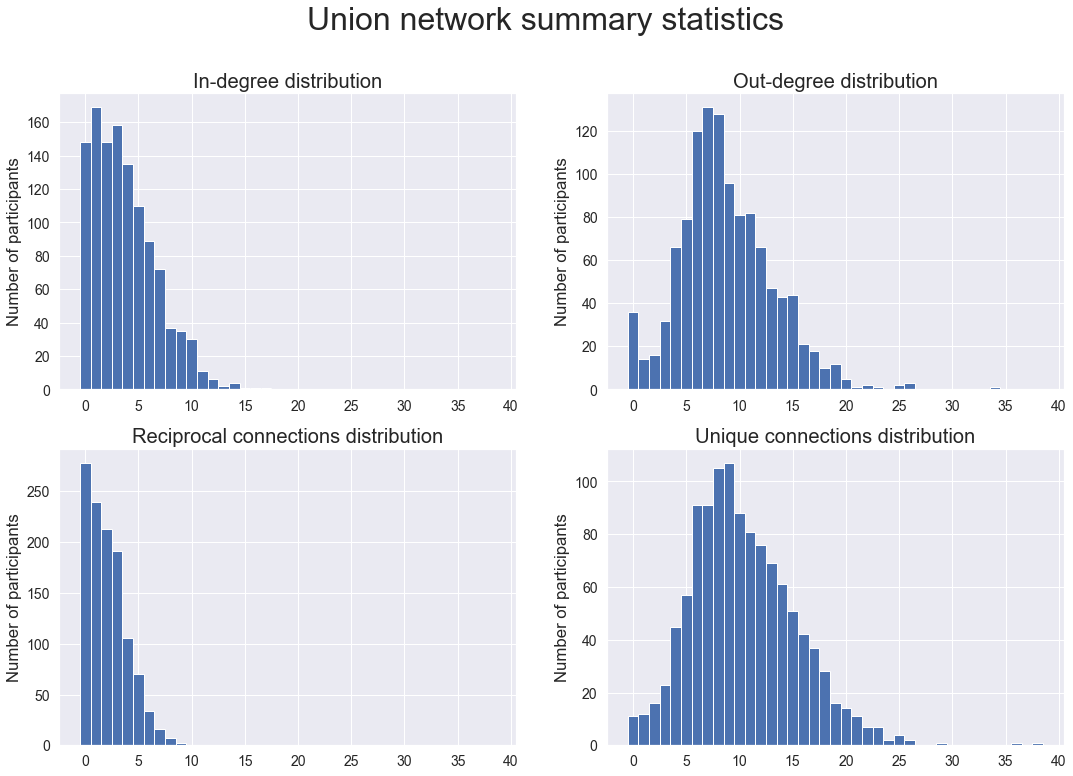

In [55]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
fig.set_size_inches(18, 12)
xmax = network['edges_unique'].max() + 1
network['edges_in'].hist(ax=axes[0], bins=np.arange(-0.5, xmax, 1))
network['edges_out'].hist(ax=axes[1], bins=np.arange(-0.5, xmax, 1))
network['edges_reciprocal'].hist(ax=axes[2], bins=np.arange(-0.5, xmax, 1))
network['edges_unique'].hist(ax=axes[3], bins=np.arange(-0.5, xmax, 1))
axes[0].set_title('In-degree distribution')
axes[1].set_title('Out-degree distribution')
axes[2].set_title('Reciprocal connections distribution')
axes[3].set_title('Unique connections distribution')
for ax in axes:
    ax.set_ylabel("Number of participants")
    
fig.suptitle("Union network summary statistics", fontsize=32);

In [56]:
df.to_csv(os.path.join(DATA_DIR, 'postprocessed/df_individual.csv'), index=True)

## Create dorm-level features

In [57]:
df['dorm'].value_counts()

Larkin             55
Roble              49
Soto               47
FroSoCo            42
Burbank            39
Twain              39
Otero              37
Donner             36
Junipero           33
Cedro              31
Arroyo             30
Rinconada          30
Meier              28
Sally Ride         26
Alondra            24
Norcliffe          24
Ujamaa             21
Cardenal           20
Faisan             16
Okada              15
Loro               13
Eucalipto          12
Granada            11
Zapata              9
Gavilan             8
Muwekma-Tah-Ruk     7
Name: dorm, dtype: int64

In [58]:
records = []
for pid in df.index:
    mydorm = df.loc[pid, 'dorm']
    tmp = df.drop(labels=pid)  # Remove 'me' from the average
    tmp = tmp[tmp['dorm'] == mydorm]
    s = tmp.mean()
    s['n_dormmates'] = len(tmp)
    s.name = pid
    records.append(s)

In [59]:
df_dorm = pd.DataFrame(records)
df_dorm.name = 'PID'
df_dorm.head()

,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,edges_in,edges_out,edges_reciprocal,edges_unique,n_dormmates
1001,5.034483,5.504310,1.839080,2.000000,4.534483,4.982759,5.379310,3.327586,5.672414,0.172414,116206.896552,4.931034,2.034483,1.948276,5.206897,10.931034,3.379310,12.758621,29.0
1004,4.947619,5.585714,1.780952,2.014286,4.714286,4.857143,5.242857,2.942857,5.628571,0.085714,147142.857143,4.957143,1.923810,2.028571,4.400000,9.914286,2.542857,11.771429,35.0
1047,5.333333,5.717105,1.684211,1.986842,4.039474,5.197368,5.421053,2.907895,5.552632,0.131579,143513.513514,5.241228,1.728070,2.000000,4.394737,8.157895,2.473684,10.078947,38.0
1078,4.000000,5.593750,1.861111,2.250000,3.875000,4.625000,5.375000,3.541667,5.000000,0.083333,129090.909091,4.430556,2.000000,1.958333,2.333333,6.833333,1.500000,7.666667,12.0
1097,5.439815,5.701389,1.777778,1.916667,4.444444,4.902778,5.263889,2.916667,5.708333,0.027778,141428.571429,5.268519,1.861111,1.916667,4.777778,10.000000,2.722222,12.055556,36.0


### Spot check - the whole dorm average should be very close (but not identical) to the whole-dorm-without-this-person average

In [60]:
test_pid = 1001
tmp = pd.DataFrame([
    df_dorm.loc[test_pid],
    df[df['dorm'] == df.loc[test_pid, 'dorm']].mean()]).T
tmp.columns = [f'Dorm without {test_pid}', 'Whole dorm']
tmp

,Dorm without 1001,Whole dorm
life_satisfaction_t1,5.034483,5.027778
empathy,5.504310,5.533333
loneliness_t1,1.839080,1.822222
stress_t1,2.000000,2.016667
BFI_E,4.534483,4.600000
BFI_A,4.982759,5.016667
BFI_O,5.379310,5.416667
BFI_N,3.327586,3.333333
BFI_C,5.672414,5.666667
intl_student,0.172414,0.166667


## Create personal-network level features

In [61]:
records = []
for pid in df.index:
    try:
        frame = df.loc[list(person_edges_unique[pid])].dropna()
    except KeyError as e:
        continue
    s = frame.mean()
    s.name = pid
    s['n_networkmates'] = len(frame)
    records.append(s)

df_mynetwork = pd.DataFrame(records)
to_drop = []
for c in df_mynetwork:
    if c.startswith('edges') or df_mynetwork[c].notnull().sum() == 0:
        to_drop.append(c)
df_mynetwork.drop(columns=to_drop, inplace=True)
df_mynetwork.head()

/Users/everettwetchler/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,n_networkmates
1001,4.916667,5.937500,2.166667,2.500000,6.750000,4.750000,5.750000,4.500000,5.000000,0.000000,175000.000000,5.750000,2.333333,1.750000,2.0
1004,4.952381,5.660714,1.857143,2.285714,4.357143,5.071429,5.357143,2.785714,5.357143,0.285714,122857.142857,5.142857,1.857143,1.857143,7.0
1047,5.055556,6.354167,1.444444,2.000000,5.250000,5.416667,5.500000,2.833333,5.166667,0.166667,91666.666667,4.833333,1.444444,2.250000,6.0
1078,4.666667,5.250000,1.000000,1.500000,2.500000,5.500000,3.500000,1.500000,4.000000,0.000000,90000.000000,4.666667,1.000000,1.500000,1.0
1097,5.400000,5.950000,1.733333,2.400000,4.400000,5.400000,5.100000,3.100000,5.700000,0.000000,130000.000000,4.866667,2.133333,2.200000,5.0


In [62]:
len(df), len(df_mynetwork)

(702, 682)

Text(0.5, 1.0, "For my-network average characteristics,\nhow many people's data went into my estimate?")

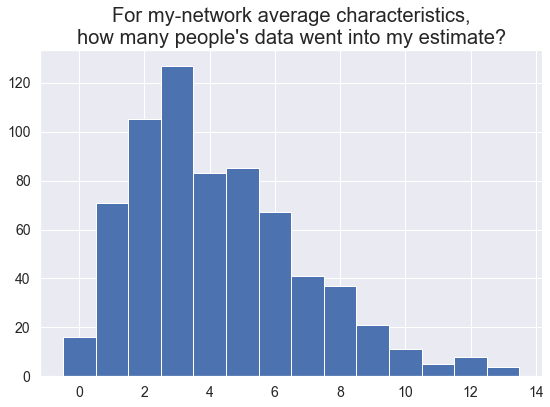

In [63]:
df_mynetwork['n_networkmates'].hist(bins=np.arange(-0.5, 14, 1))
plt.title('For my-network average characteristics,\nhow many people\'s data went into my estimate?')

In [64]:
test_pid = 1004
print(df_mynetwork.loc[test_pid])
df.loc[person_edges_unique[test_pid]].dropna()

life_satisfaction_t1         4.952381
empathy                      5.660714
loneliness_t1                1.857143
stress_t1                    2.285714
BFI_E                        4.357143
BFI_A                        5.071429
BFI_O                        5.357143
BFI_N                        2.785714
BFI_C                        5.357143
intl_student                 0.285714
family_income           122857.142857
life_satisfaction_t2         5.142857
loneliness_t2                1.857143
stress_t2                    1.857143
n_networkmates               7.000000
Name: 1004, dtype: float64


/Users/everettwetchler/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,edges_in,edges_out,edges_reciprocal,edges_unique
PID,,,,,,,,,,,,,,,,,,,,,,
4481,male,other_or_mixed,Burbank,5.500000,4.625,2.000000,2.5,4.0,3.5,6.0,3.0,3.0,1.0,220000.0,5.833333,2.000000,1.5,4_masters,4.0,12.0,2.0,14.0
2886,female,white,Donner,5.166667,6.750,2.000000,2.5,3.5,6.0,5.5,3.5,5.0,0.0,220000.0,4.500000,2.000000,2.0,4_masters,4.0,16.0,3.0,17.0
8077,female,east_asian,Donner,5.000000,5.375,2.000000,2.0,4.5,5.0,5.0,3.0,5.5,0.0,220000.0,4.666667,2.000000,2.5,5_advanced,2.0,3.0,1.0,4.0
7123,male,hispanic,Zapata,3.333333,4.750,2.000000,2.0,3.5,6.0,4.0,2.0,4.5,0.0,30000.0,4.166667,1.666667,1.5,1_ hs,8.0,9.0,7.0,10.0
3098,male,hispanic,Donner,6.333333,6.250,1.666667,2.5,4.5,3.5,6.5,2.0,7.0,1.0,90000.0,6.666667,2.000000,2.0,4_masters,6.0,6.0,2.0,10.0
1508,male,hispanic,Donner,4.000000,6.125,2.000000,2.0,4.5,7.0,5.0,3.5,6.0,0.0,70000.0,4.500000,1.666667,1.5,1_ hs,5.0,12.0,3.0,14.0
6003,male,other_or_mixed,Donner,5.333333,5.750,1.333333,2.5,6.0,4.5,5.5,2.5,6.5,0.0,10000.0,5.666667,1.666667,2.0,3_college_fouryear,14.0,12.0,7.0,19.0


In [65]:
a = set(df.index)
b = set(df_dorm.index)
c = set(df_mynetwork.index)
print(len(a), len(b), len(c))
print(len(b - a), len(c - a), len(c & b))

702 702 682
0 0 682


In [66]:
df_dorm.columns = ['dorm_' + c for c in df_dorm.columns]
df_mynetwork.columns = ['network_' + c for c in df_mynetwork.columns]

In [67]:
df = pd.merge(df, df_dorm, left_index=True, right_index=True, how='left')
df = pd.merge(df, df_mynetwork, left_index=True, right_index=True, how='left')
print(df.shape)
df.head()

(702, 56)


,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,edges_in,edges_out,edges_reciprocal,edges_unique,dorm_life_satisfaction_t1,dorm_empathy,dorm_loneliness_t1,dorm_stress_t1,dorm_BFI_E,dorm_BFI_A,dorm_BFI_O,dorm_BFI_N,dorm_BFI_C,dorm_intl_student,dorm_family_income,dorm_life_satisfaction_t2,dorm_loneliness_t2,dorm_stress_t2,dorm_edges_in,dorm_edges_out,dorm_edges_reciprocal,dorm_edges_unique,dorm_n_dormmates,network_life_satisfaction_t1,network_empathy,network_loneliness_t1,network_stress_t1,network_BFI_E,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,6.5,3.5,5.5,0.0,70000.0,6.166667,2.000000,1.5,4_masters,3,10,1,12,5.034483,5.504310,1.839080,2.000000,4.534483,4.982759,5.379310,3.327586,5.672414,0.172414,116206.896552,4.931034,2.034483,1.948276,5.206897,10.931034,3.379310,12.758621,29.0,4.916667,5.937500,2.166667,2.500000,6.750000,4.750000,5.750000,4.500000,5.000000,0.000000,175000.000000,5.750000,2.333333,1.750000,2.0
1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,5.5,3.0,4.5,1.0,10000.0,3.000000,2.666667,3.0,0_less_than_hs,7,11,6,12,4.947619,5.585714,1.780952,2.014286,4.714286,4.857143,5.242857,2.942857,5.628571,0.085714,147142.857143,4.957143,1.923810,2.028571,4.400000,9.914286,2.542857,11.771429,35.0,4.952381,5.660714,1.857143,2.285714,4.357143,5.071429,5.357143,2.785714,5.357143,0.285714,122857.142857,5.142857,1.857143,1.857143,7.0
1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,6.5,3.0,7.0,0.0,220000.0,5.166667,2.000000,3.0,4_masters,6,9,3,12,5.333333,5.717105,1.684211,1.986842,4.039474,5.197368,5.421053,2.907895,5.552632,0.131579,143513.513514,5.241228,1.728070,2.000000,4.394737,8.157895,2.473684,10.078947,38.0,5.055556,6.354167,1.444444,2.000000,5.250000,5.416667,5.500000,2.833333,5.166667,0.166667,91666.666667,4.833333,1.444444,2.250000,6.0
1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0.0,130000.0,5.500000,2.333333,3.0,5_advanced,1,7,0,8,4.000000,5.593750,1.861111,2.250000,3.875000,4.625000,5.375000,3.541667,5.000000,0.083333,129090.909091,4.430556,2.000000,1.958333,2.333333,6.833333,1.500000,7.666667,12.0,4.666667,5.250000,1.000000,1.500000,2.500000,5.500000,3.500000,1.500000,4.000000,0.000000,90000.000000,4.666667,1.000000,1.500000,1.0
1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,4.5,1.5,5.5,0.0,90000.0,5.833333,2.000000,2.5,5_advanced,6,4,4,6,5.439815,5.701389,1.777778,1.916667,4.444444,4.902778,5.263889,2.916667,5.708333,0.027778,141428.571429,5.268519,1.861111,1.916667,4.777778,10.000000,2.722222,12.055556,36.0,5.400000,5.950000,1.733333,2.400000,4.400000,5.400000,5.100000,3.100000,5.700000,0.000000,130000.000000,4.866667,2.133333,2.200000,5.0


## Write

In [68]:
dorm_counts = df['dorm'].value_counts()
dorm_counts

Larkin             55
Roble              49
Soto               47
FroSoCo            42
Burbank            39
Twain              39
Otero              37
Donner             36
Junipero           33
Cedro              31
Arroyo             30
Rinconada          30
Meier              28
Sally Ride         26
Alondra            24
Norcliffe          24
Ujamaa             21
Cardenal           20
Faisan             16
Okada              15
Loro               13
Eucalipto          12
Granada            11
Zapata              9
Gavilan             8
Muwekma-Tah-Ruk     7
Name: dorm, dtype: int64

In [69]:
# A lazy way to take a stratified sample of 20% of dorms
testing_dorms = list(dorm_counts.iloc[2::5].index)
print(len(testing_dorms))
testing_dorms

5


['Soto', 'Donner', 'Meier', 'Cardenal', 'Granada']

In [70]:
training_dorms = [d for d in dorm_counts.index if d not in testing_dorms]
print(len(training_dorms))
training_dorms

21


['Larkin',
 'Roble',
 'FroSoCo',
 'Burbank',
 'Twain',
 'Otero',
 'Junipero',
 'Cedro',
 'Arroyo',
 'Rinconada',
 'Sally Ride',
 'Alondra',
 'Norcliffe',
 'Ujamaa',
 'Faisan',
 'Okada',
 'Loro',
 'Eucalipto',
 'Zapata',
 'Gavilan',
 'Muwekma-Tah-Ruk']

In [71]:
def write_datasets(frame, prefix):
#     fname = f'postprocessed/{prefix}_all.csv'
#     print("Writing", fname)
#     frame.to_csv(os.path.join(DATA_DIR, fname), index=True)

    frame_train = frame[frame['dorm'].isin(training_dorms)]
    fname = f'postprocessed/{prefix}_train.csv'
    print("Writing", fname)
    frame_train.to_csv(os.path.join(DATA_DIR, fname), index=True)

    frame_test = frame[frame['dorm'].isin(testing_dorms)]
    fname = f'postprocessed/{prefix}_test.csv'
    print("Writing", fname)
    frame_test.to_csv(os.path.join(DATA_DIR, fname), index=True)

    print(f"Holding out {len(frame_test) *100 / len(frame):.1f}% of data for testing")

In [72]:
write_datasets(df, 'df_full')

Writing postprocessed/df_full_train.csv
Writing postprocessed/df_full_test.csv
Holding out 20.2% of data for testing


In [73]:
write_datasets(df[[c for c in df.columns if not (c.startswith('dorm_') or c.startswith('network_'))]],
               'df_indiv_only')

Writing postprocessed/df_indiv_only_train.csv
Writing postprocessed/df_indiv_only_test.csv
Holding out 20.2% of data for testing


In [74]:
write_datasets(df[[c for c in df.columns if not c.startswith('network_')]],
               'df_indiv_and_dorm')

Writing postprocessed/df_indiv_and_dorm_train.csv
Writing postprocessed/df_indiv_and_dorm_test.csv
Holding out 20.2% of data for testing
